In [1]:
import numpy as np
logical_hub_point = np.load('./aihub_point/logical.npy')
print(logical_hub_point)

[47.47 55.35 35.68 ... 34.23 17.17 11.09]


In [2]:
len(logical_hub_point)

13755

/tmp/ipykernel_1277268/1268275771.py:11: MatplotlibDeprecationWarning: The get_fontconfig_fonts function was deprecated in Matplotlib 3.5 and will be removed two minor releases later.
  fm.get_fontconfig_fonts()
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' 

/home/daegon/.conda/envs/flask/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc


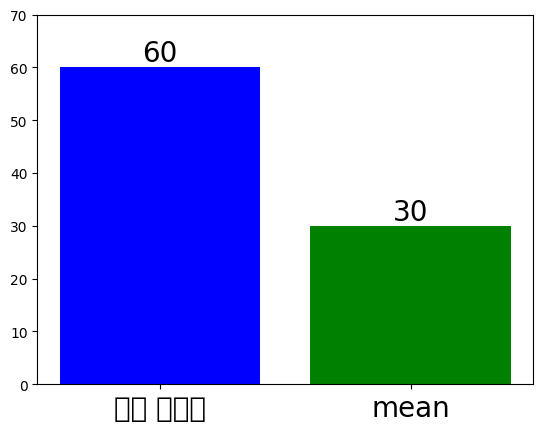

In [5]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import numpy as np

x = np.arange(2)
logical_point = 60; logical_mean = 30
font_size = 20
print(mpl.matplotlib_fname())
font_location = './나눔고딕/NanumFontSetup_TTF_GOTHIC/NanumGothic.ttf'
fm.get_fontconfig_fonts()
font_name = fm.FontProperties(fname=font_location).get_name()

points1 = [logical_point, logical_mean]
names = ['나의 논리성', 'mean']
# plt.title("logical point")
plt.xticks(x,names)
plt.bar(x, points1, color=['blue','green'])
plt.ylim(0, max(points1)+10)
plt.rc('font', family=font_name)
plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=10)  # y축 눈금 폰트 크기


# 그래프에 텍스트 넣기
for i, v in enumerate(x):
    plt.text(v, points1[i], points1[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
    fontsize = font_size, 
    color='black',
    horizontalalignment='center',  # horizontalalignment (left, center, right)
    verticalalignment='bottom')    # verticalalignment (top, center, bottom)

# plt.savefig('static/images/logical.png') 
plt.show()  

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

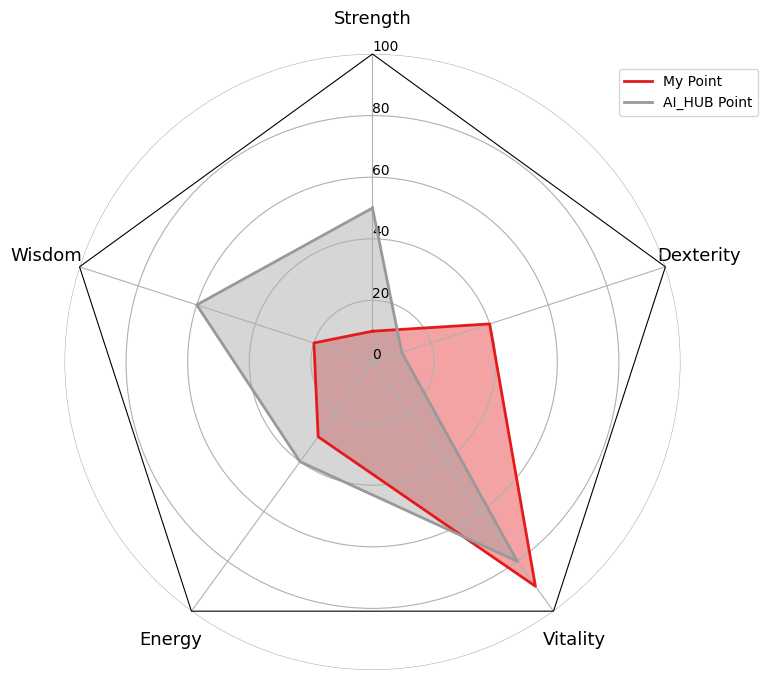

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
 
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
 
## 데이터 준비
df = pd.DataFrame({
'Character': ['My Point','AI_HUB Point'],
'Strength': [10, 50],
'Dexterity': [40, 10],
'Vitality': [90, 80],
'Energy': [30, 40],
'Wisdom': [20, 60]
})
labels = df.columns[1:]
num_labels = len(labels)
    
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
    
my_palette = plt.cm.get_cmap("Set1", len(df.index))
 
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot(polar=True)
for i, row in df.iterrows():
    color = my_palette(i)
    data = df.iloc[i].drop('Character').tolist()
    data += data[:1]
    
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=20) ## x축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다.
    ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
    plt.yticks([pr*10 for pr in range(0,11,2)],[str(pr*10) for pr in range(0,11,2)], fontsize=10) ## y축 눈금 설정
    plt.ylim(0,100)
    
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid', label=row.Character) ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
    
for g in ax.yaxis.get_gridlines(): ## grid line 
    g.get_path()._interpolation_steps = len(labels)
 
spine = Spine(axes=ax,
          spine_type='circle',
          path=Path.unit_regular_polygon(len(labels)))
 
## Axes의 중심과 반지름을 맞춰준다.
spine.set_transform(Affine2D().scale(.5).translate(.5, .5)+ax.transAxes)
           
ax.spines = {'polar':spine} ## frame의 모양을 원에서 폴리곤으로 바꿔줘야한다.
 
plt.legend(loc=(0.9,0.9))
plt.show()

In [4]:
print(mpl.get_cachedir())

/home/daegon/.cache/matplotlib
